# SGPS Molecular Techniques
## Exercise 2: Differential gene expression analysis - working with miRNAs

#### Gene Expression data from Gene Expression Omnibus
+ https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE123336
+ How to get the metadata is covered in here: https://github.com/jpwhalley/2024_Biostatistics/tree/main/e2_Getting_Data

#### Specifically from this paper
1.	LaRocca D, Barns S, Hicks SD, Brindle A et al. Comparison of serum and saliva miRNAs for identification and characterization of mTBI in adult mixed martial arts fighters. *PLoS One* 2019;14(1):e0207785.


In [1]:
# Import the packages we need
import pandas as pd
import numpy as np
# from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='poster')

In [2]:
# Get the data in
human_expression = pd.read_csv('GSE123336_MMA_CountMatrix.csv.gz', index_col=0, compression='gzip')
human_expression = human_expression.apply(pd.to_numeric, errors='coerce')
human_expression

,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9,Sample 10,...,Sample 209,Sample 210,Sample 211,Sample 212,Sample 213,Sample 214,Sample 215,Sample 216,Sample 217,Sample 218
Transcript,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-2-3p,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.00000,...,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
hsa-let-7a-3p,1.814330e+00,1.884990e+00,9.071630e-01,1.845450e+00,2.72149,8.470000e-15,2.405300,1.530000e-29,18.96990,1.81433,...,0.000000,7.614470e+00,3.590000e-33,112.0,1.048180e+01,5.267150e+00,1.436690e+00,1.770000e-25,3.324670e+00,1.084910e+01
hsa-let-7a-5p,6.748260e-02,8.933470e+00,3.849430e+01,5.292600e+01,51.31040,1.819660e+01,64.341200,2.037650e-02,27.29310,22.24850,...,16.620300,7.021620e+01,3.500000e-11,2.0,6.896210e+00,4.988360e+01,1.778270e+01,4.089640e+00,3.688990e+00,4.837710e+01
hsa-let-7b-3p,2.000000e+00,2.060000e-18,1.000000e+00,1.763140e+00,3.00000,2.000000e+00,7.774990,1.000000e+00,1.60098,13.00000,...,6.000000,9.200000e-20,1.680000e-20,74.0,2.054810e+00,6.960000e-16,1.480000e-09,2.340000e-17,7.440000e-28,6.780000e-18
hsa-let-7b-5p,5.760000e-08,3.924060e+00,7.840000e-07,5.680000e-12,5.88611,3.908910e+00,7.478580,1.441910e+01,4.97589,10.57150,...,8.926790,9.743710e+00,1.007520e-04,0.0,2.701160e+00,8.300660e+00,6.292900e+00,2.440000e-06,2.790740e+00,4.142650e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-miR-98-5p,4.285170e-02,5.394800e+00,3.197370e+00,3.232340e-01,3.87996,1.289790e-01,0.248724,2.627510e-03,30.69600,4.59449,...,0.000266,6.484830e+00,3.500000e-11,0.0,7.480000e-08,3.730910e-02,2.487910e-04,9.460000e-14,1.980000e-07,4.732800e+00
hsa-miR-99a-3p,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.00000,2.000000e+00,0.000000,0.000000e+00,0.00000,0.00000,...,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
hsa-miR-99a-5p,4.500000e+00,1.244440e+01,1.100000e+01,8.000000e+00,15.00000,2.200000e+01,2.000000,8.879890e+01,54.37500,98.30950,...,149.873000,9.807690e+01,2.000000e+00,0.0,4.599400e+01,3.299930e+01,1.014890e+02,2.228570e+01,7.789620e+01,2.057140e+01


In [3]:
metadata = pd.read_csv('GSE123336_metadata.csv', index_col=0)
metadata

,tissue,timepoint,hits to the head,subject
Sample 1,Saliva,0d post,2,MMA001
Sample 2,Serum,0d post,2,MMA001
Sample 3,Saliva,0d pre,0,MMA001
Sample 4,Serum,0d pre,0,MMA001
Sample 5,Saliva,1wk post,2,MMA001
...,...,...,...,...
Sample 214,Serum,0d pre,0,MMA040
Sample 215,Serum,0d post,35,MMA041
Sample 216,Serum,0d pre,0,MMA041
Sample 217,Serum,0d post,7,MMA042


In [7]:
# Can we see which miRNA are differentially expressed in Serum pre and post fight?
# Filter for serum samples only
serum_samples = metadata[(metadata['tissue'] == 'Serum') & 
                          (metadata['timepoint'].isin(['0d pre', '0d post']))]

# Get the corresponding sample names
serum_sample_names = serum_samples.index

# Subset the expression data
serum_expression = human_expression[serum_sample_names]
serum_expression

pre_fight_samples = serum_samples[serum_samples['timepoint'] == '0d pre'].index
post_fight_samples = serum_samples[serum_samples['timepoint'] == '0d post'].index

pre_fight_expression = serum_expression[pre_fight_samples]
post_fight_expression = serum_expression[post_fight_samples]
pre_fight_expression

,Sample 4,Sample 9,Sample 23,Sample 24,Sample 30,Sample 36,Sample 48,Sample 51,Sample 56,Sample 57,...,Sample 200,Sample 202,Sample 204,Sample 206,Sample 208,Sample 210,Sample 212,Sample 214,Sample 216,Sample 218
Transcript,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-2-3p,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.00000,0.00000,...,0.0,0.000,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
hsa-let-7a-3p,1.845450e+00,18.96990,7.430000e-14,1.940000e-25,3.369420e+00,3.628650,3.330000e-18,253.0,3.62865,0.00000,...,59.0,238.629,4.259500e+00,1.739980,210.0,7.614470e+00,112.0,5.267150e+00,1.770000e-25,1.084910e+01
hsa-let-7a-5p,5.292600e+01,27.29310,5.721130e-02,2.590000e-08,3.275180e+01,3.821750,4.303890e+00,0.0,6.78281,299.22700,...,0.0,1.000,8.427430e+00,10.858200,0.0,7.021620e+01,2.0,4.988360e+01,4.089640e+00,4.837710e+01
hsa-let-7b-3p,1.763140e+00,1.60098,1.820000e-19,2.834730e+00,2.430000e-14,6.000000,2.210000e-33,163.0,0.00000,0.00000,...,53.0,146.368,3.275380e+00,1.849850,168.0,9.200000e-20,74.0,6.960000e-16,2.340000e-17,6.780000e-18
hsa-let-7b-5p,5.680000e-12,4.97589,4.050000e-15,3.740000e-08,6.758380e+00,11.216700,6.030000e-18,0.0,14.81240,1.92711,...,0.0,0.000,1.275900e+01,4.490080,0.0,9.743710e+00,0.0,8.300660e+00,2.440000e-06,4.142650e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa-miR-98-5p,3.232340e-01,30.69600,5.721130e-02,2.050000e-09,9.481140e+00,0.000054,4.370000e-10,0.0,1.78356,11.14770,...,0.0,0.000,1.690000e-10,0.000038,0.0,6.484830e+00,0.0,3.730910e-02,9.460000e-14,4.732800e+00
hsa-miR-99a-3p,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.00000,0.00000,...,0.0,0.000,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
hsa-miR-99a-5p,8.000000e+00,54.37500,0.000000e+00,8.000000e+00,3.000000e+00,79.000000,3.000000e+00,0.0,67.19050,20.71430,...,0.0,0.000,2.935090e+01,0.005040,0.0,9.807690e+01,0.0,3.299930e+01,2.228570e+01,2.057140e+01


In [8]:
from scipy.stats import mannwhitneyu

# Initialize a list to store results
diff_expression_results = []

# Iterate through each miRNA
for miRNA in serum_expression.index:
    # Extract expression levels for this miRNA
    pre_values = pre_fight_expression.loc[miRNA]
    post_values = post_fight_expression.loc[miRNA]
    
    # Perform the Mann-Whitney U test
    stat, p_value = mannwhitneyu(pre_values, post_values, alternative='two-sided')
    
    # Store the results
    diff_expression_results.append({
        'miRNA': miRNA,
        'statistic': stat,
        'p_value': p_value
    })

# Convert the results to a DataFrame
diff_expression_df = pd.DataFrame(diff_expression_results)

# Apply multiple testing correction (e.g., Benjamini-Hochberg)
from statsmodels.stats.multitest import multipletests

diff_expression_df['Significant'], diff_expression_df['adjusted_p_value'], _, _ = multipletests(diff_expression_df['p_value'], method='fdr_bh')

# Sort the results by adjusted p-value
diff_expression_df = diff_expression_df.sort_values('p_value')
diff_expression_df

,miRNA,statistic,p_value,Significant,adjusted_p_value
111,hsa-miR-125b-2-3p,473.5,0.000012,True,0.019786
829,hsa-miR-3934-5p,598.0,0.000017,True,0.019786
383,hsa-miR-214-3p,538.0,0.000032,True,0.024891
37,hsa-miR-10b-5p,520.0,0.000070,True,0.040821
35,hsa-miR-10a-5p,545.0,0.000160,False,0.074919
...,...,...,...,...,...
246,hsa-miR-1537-3p,1012.5,1.000000,False,1.000000
732,hsa-miR-3684,1012.5,1.000000,False,1.000000
1734,hsa-miR-639,1012.5,1.000000,False,1.000000
230,hsa-miR-147a,1012.5,1.000000,False,1.000000


In [9]:
# Calculate log2 fold change (post/pre)
log2_fold_change = (post_fight_expression.mean(axis=1) / pre_fight_expression.mean(axis=1)).apply(np.log2)

# Add fold change to the differential expression results
diff_expression_df.set_index('miRNA', inplace=True)
diff_expression_df['log2FoldChange'] = log2_fold_change

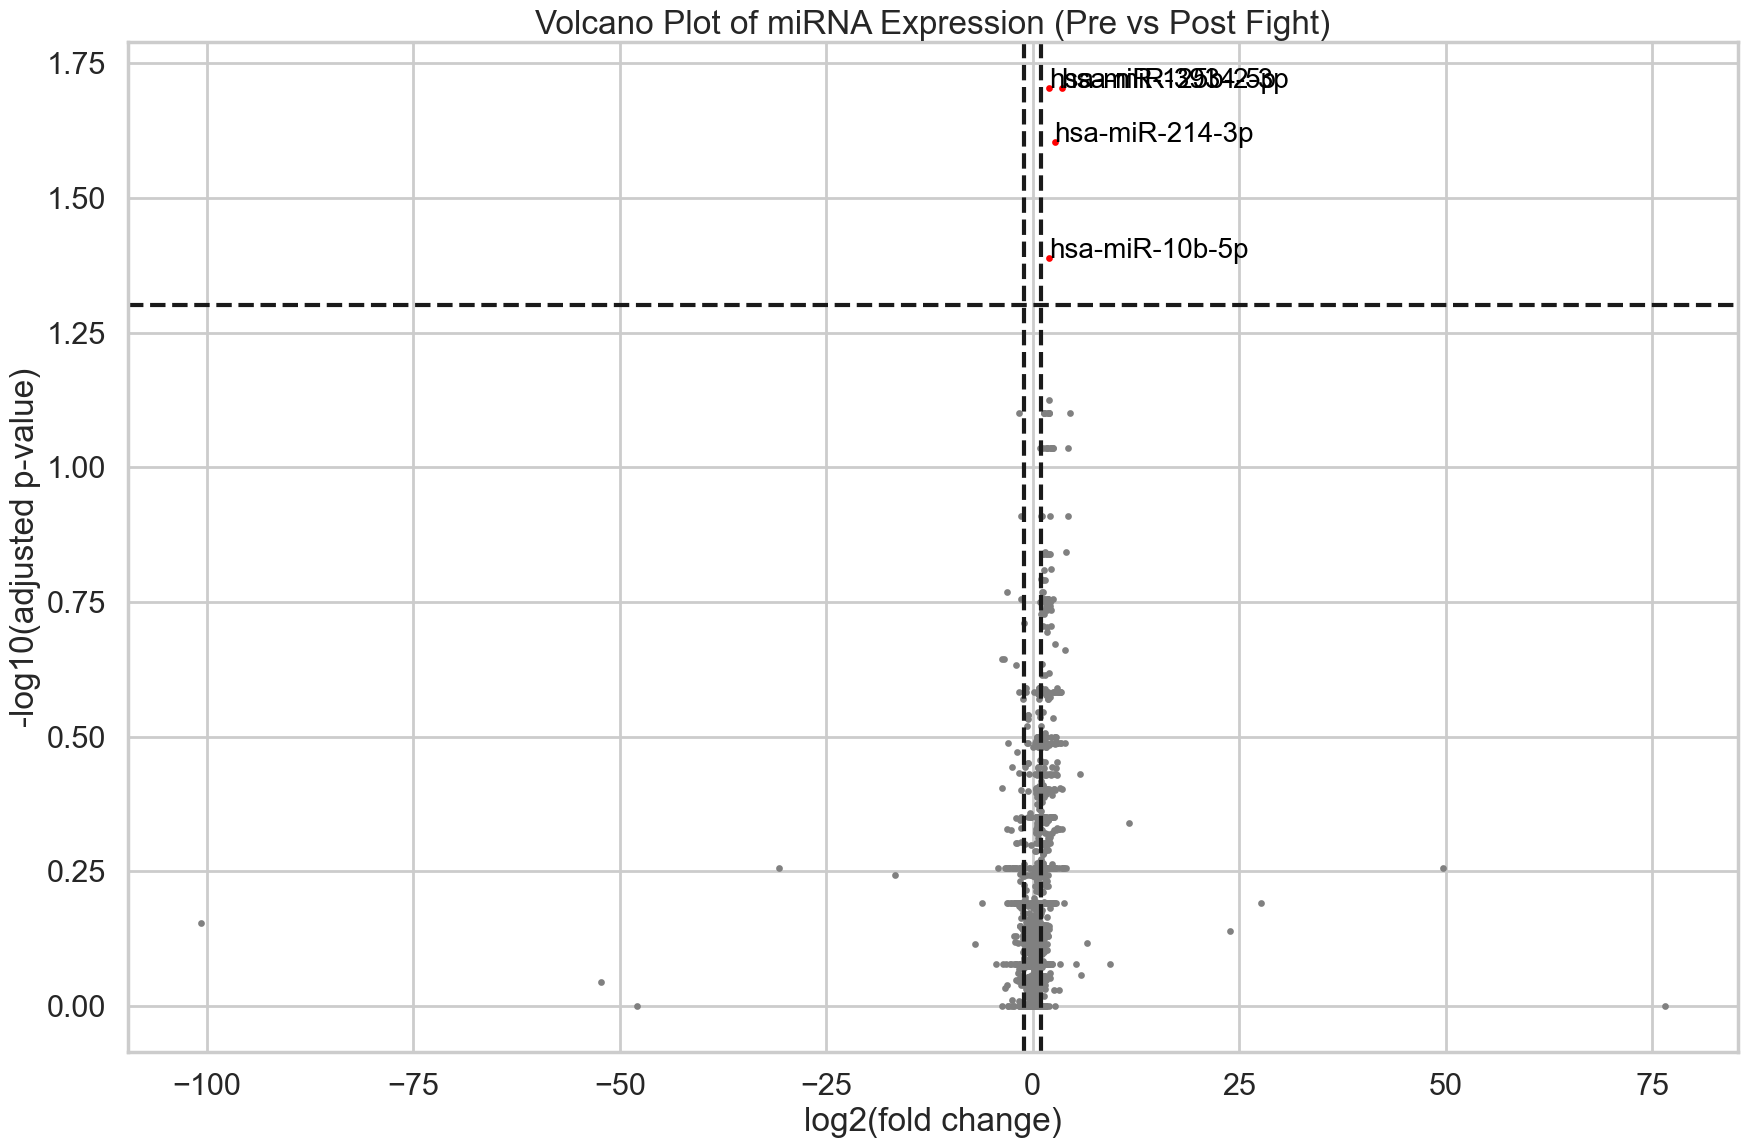

In [10]:
# Define thresholds
cutoff_padj = 0.05  # Adjust this value if necessary
lfc_cut = 1  # Log2 fold change threshold

# Create significance flags
fdr = np.ones(len(diff_expression_df), dtype=int)
fdr[diff_expression_df['adjusted_p_value'] < cutoff_padj] = 2
fdr[(diff_expression_df['adjusted_p_value'] < cutoff_padj) & (abs(diff_expression_df['log2FoldChange']) >= lfc_cut)] = 3
diff_expression_df['fdr'] = fdr

# Plot the volcano plot
fig = plt.figure(figsize=(18, 12))
colours = ['gray', 'blue', 'red']

for i in range(1, 4):
    plt.scatter(diff_expression_df['log2FoldChange'][diff_expression_df['fdr'] == i],
                -np.log10(diff_expression_df['adjusted_p_value'][diff_expression_df['fdr'] == i]),
                s=8, c=colours[i-1])

# Add cutoff lines for log2 fold change and adjusted p-value
plt.axvline(-lfc_cut, color="k", linestyle='--')
plt.axvline(lfc_cut, color="k", linestyle='--')
plt.axhline(-np.log10(cutoff_padj), color="k", linestyle='--')

# Label the significant miRNAs
significant_miRNAs = diff_expression_df[(diff_expression_df['fdr'] == 3)]
texts = []
for label in significant_miRNAs.index:
    texts.append(plt.text(significant_miRNAs['log2FoldChange'].loc[label], 
             -np.log10(significant_miRNAs['adjusted_p_value'].loc[label]), 
             label, 
             color='black', 
             fontsize=20))
# adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

# Add labels and title
plt.title('Volcano Plot of miRNA Expression (Pre vs Post Fight)')
plt.xlabel('log2(fold change)')
plt.ylabel('-log10(adjusted p-value)')

# Show the plot
plt.tight_layout()
plt.show()
